# 面积分

In [3]:
面积分一般步骤：
- 绘图
- 定义矢量场
- 定义积分面
- 变量代换，求出积分面的微元以及变换后的矢量场
- 求出矢量场再面积微元法向的投影作为被积函数

符号化的面积分结果:
2⋅π 1                              
 ⌠  ⌠                              
 ⎮  ⎮ r⋅f(r⋅cos(θ), r⋅sin(θ)) dr dθ
 ⌡  ⌡                              
 0  0                              


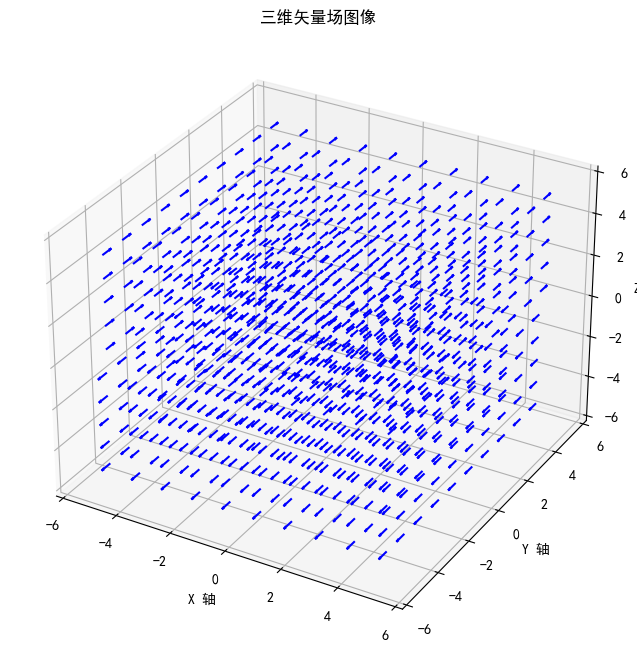

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 创建 3D 网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 定义 3D 矢量场的分量
A_x = np.zeros_like(X)
A_y = y
A_z = np.zeros_like(X)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color='b')

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([-6, 6])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像')
plt.show()

In [3]:
import sympy as sp
from sympy.vector import CoordSys3D, Del
import numpy as np
from sympy import Function

# 创建一个三维坐标系
N = CoordSys3D('N')
x, y, z = N.x, N.y, N.z

# 定义 nabla 算子
delop = Del()

# 定义向量场 A(x, y, z)
A = 0 *N.i + y * N.j + 0 * N.k
print('我们的向量场是：')
print(A)
print('向量场散度为')
print(sp.simplify(delop & A))

我们的向量场是：
N.y*N.j
向量场散度为
1


In [4]:
rho = sp.symbols('rho')
cx = cy = cz =0
center = cx * N.i + cy * N.j + cz * N.k

# 将直角坐标转换为球坐标
r, theta, phi = sp.symbols('r theta phi')
# 面积微分元素为 R^2  sin\theta d\theta d\phi
# area_element = rho / np.sqrt(rho ** 2 - (x - cx) ** 2 - (y - cy)**2)
area_element = rho ** 2 * sp.sin(theta)
print('面积微分元素为：')
print(area_element)
rhat = sp.sin(theta) * sp.cos(phi) * N.i + sp.sin(theta) * sp.sin(phi) * N.j + sp.cos(phi) * N.k


# 在球坐标中表示向量场
A_polar = A.subs({x: rho * sp.sin(theta) * sp.cos(phi), y: rho * sp.sin(theta) * sp.sin(phi), z: rho * sp.cos(theta)})
print('面积微元处场的代表向量为：')
print(A_polar)

# 计算单位圆内的面积分，theta 的范围是 0 到 pi，phi 的范围是 0 到 2pi
area_integral = sp.integrate(area_element * (A_polar & rhat) , (theta, 0, sp.pi), (phi, 0, 2 * sp.pi))

# 输出面积分结果
print("面积分结果:")
sp.pprint(area_integral)

面积微分元素为：
rho**2*sin(theta)
面积微元处场的代表向量为：
(rho*sin(phi)*sin(theta))*N.j
面积分结果:
     3
4⋅π⋅ρ 
──────
  3   
